In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract
import cv2
import seaborn as sb
import tensorflow as tf
conf = r'-- oem 2'

2022-03-01 17:45:25.277456: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/morad/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-01 17:45:25.277541: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('../raw_data/images_name.csv')
data = pd.read_csv('../raw_data/quotes.csv')
df_im = df.tail(10)

In [3]:
df_im

,image_name,longest_comment,comments_5
32525,9950913,embers of a strike at Yale University .,158869 embers of a strike at Yale Universit...
32526,996089206,"A older man with a white shirt , golf cap and...","158870 A older man with a white shirt , go..."
32527,996712323,A man laying on the floor as he works on an u...,158875 A man laying on the floor as he wor...
32528,99679241,A gray bird stands majestically on a beach whi...,158880 A gray bird stands majestically on a...
32529,996962407,a man with a wheelbarrow is standing outside ...,158885 a man with a wheelbarrow is standin...
32530,997338199,"Woman writing on a pad in room with gold , de...",158890 Woman writing on a pad in room with...
32531,997722733,A person in a red shirt climbing up a rock fa...,158895 A person in a red shirt climbing up...
32532,997876722,Two male construction workers are working on ...,158900 Two male construction workers are w...
32533,99804383,An older busker in glasses plays an Eastern st...,158905 An older busker in glasses plays an ...
32534,998845445,A man in shorts and a Hawaiian shirt leans ov...,158910 A man in shorts and a Hawaiian shir...


In [4]:
data.head(10)

,quote,author,category
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love"
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh..."
5,We accept the love we think we deserve.,"Stephen Chbosky, The Perks of Being a Wallflower","inspirational, love"
6,"Only once in your life, I truly believe, you f...",Bob Marley,love
7,It is better to be hated for what you are than...,"André Gide, Autumn Leaves","life, love"
8,"As he read, I fell in love the way you fall as...","John Green, The Fault in Our Stars",love
9,"The opposite of love is not hate, it's indiffe...",Elie Wiesel,"activism, apathy, hate, indifference, inspirat..."


In [5]:
images = df_im['image_name']
titles = df_im['longest_comment']

In [6]:
images = list(images)
titles = list(titles)

In [7]:
imgs = []
for i in images:
    imgs.append(mpimg.imread(f'../raw_data/10_images/{i}.jpg'))

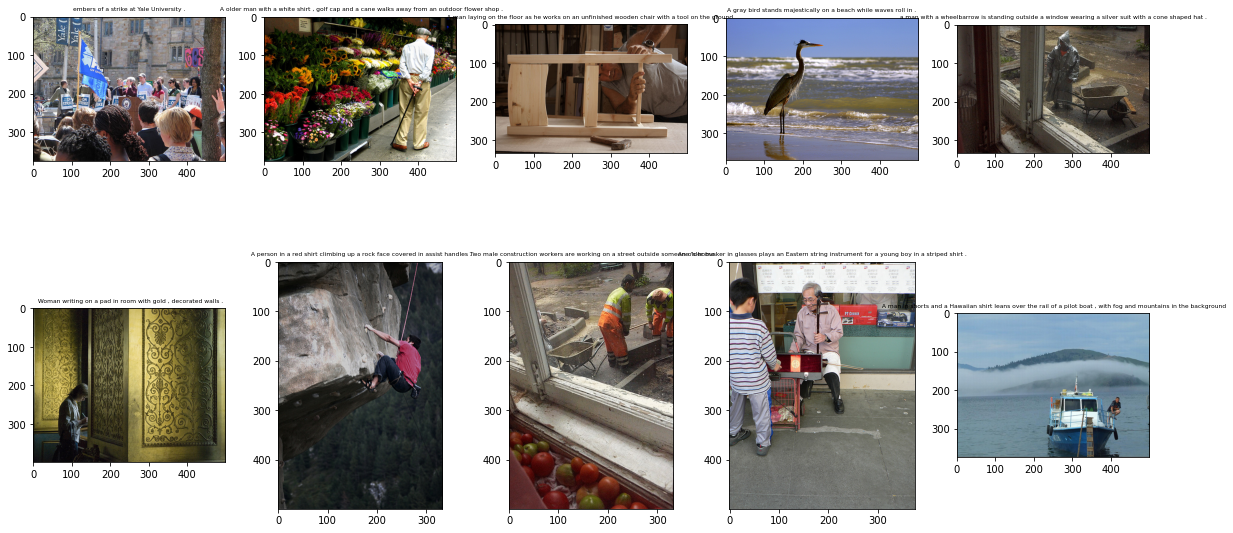

In [8]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5, i+1)
    img = imgs[i]
    title = titles[i]
    plt.imshow(img)
    plt.title(title, fontsize=6)

Text(0.5, 1.0, ' A older man with a white shirt , golf cap and a cane walks away from an outdoor flower shop .')

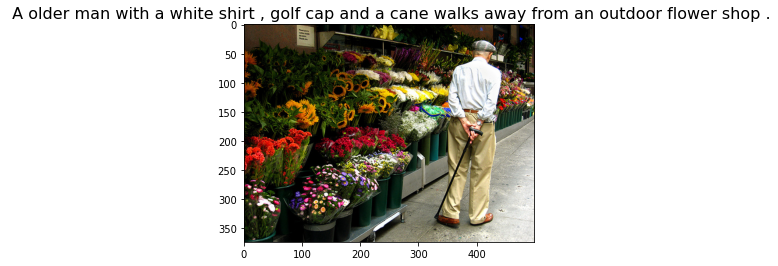

In [9]:
img = imgs[1]
title = titles[1]
plt.imshow(img)
plt.title(title, fontsize=16)

In [10]:
data = {
    'photo_name' : [],
    'flattenPhoto' : [],
    'text' : [],
    }

In [11]:
MyModel = tf.keras.models.Sequential()
MyModel.add(tf.keras.applications.ResNet50(
    include_top = False, weights='imagenet',    pooling='avg',
))
MyModel.layers[0].trainable = False

2022-03-01 17:45:40.520923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-01 17:45:40.522127: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/morad/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-01 17:45:40.522391: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/morad/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-01 17:45:40.522492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could

In [12]:
def LoadDataAndDoEssentials(path, h, w):
    img = mpimg.imread(path)
    #data['text'].append(pytesseract.image_to_string(img, config = conf))
    img = cv2.resize(img, (h, w))
    ## Expanding image dims so this represents 1 sample
    img = img = np.expand_dims(img, 0)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    extractedFeatures = MyModel.predict(img)
    extractedFeatures = np.array(extractedFeatures)
    data['flattenPhoto'].append(extractedFeatures.flatten())

In [13]:
def ReadAndStoreMyImages(path):
    for i in images:
        #imgs.append(mpimg.imread(f'../raw_data/10_images/{i}.jpg'))
        data['photo_name'].append(i)
        imagePath = f"{path}/{i}.jpg"
        LoadDataAndDoEssentials(imagePath, 224, 224)

In [14]:
ReadAndStoreMyImages('../raw_data/10_images')

In [15]:
Training_Feature_vector = np.array(data['flattenPhoto'], dtype = 'float64')
from sklearn.cluster import AgglomerativeClustering
kmeans = AgglomerativeClustering(n_clusters = 2)
kmeans.fit(Training_Feature_vector)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

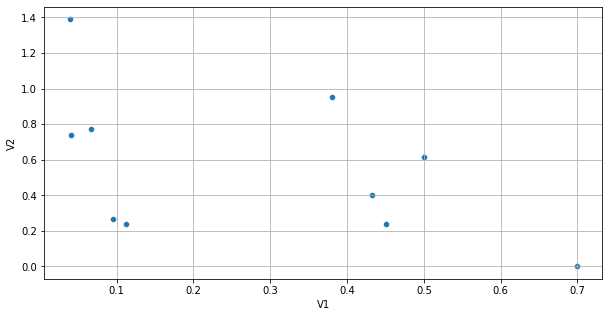

In [16]:
dimReducedDataFrame = pd.DataFrame(Training_Feature_vector)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2'})
#dimReducedDataFrame['Category'] = list (df['Class_of_image'])
plt.figure(figsize = (10, 5))
sb.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2')
plt.grid(True)
plt.show()

In [17]:
dimReducedDataFrame

,V1,V2,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.040938,0.739391,0.077604,1.123790,0.133935,1.308834,0.382309,0.628312,2.810469,0.242012,...,0.079575,0.202225,0.641757,0.244652,0.276120,0.004762,1.638431,0.012703,0.328480,0.167537
1,0.095541,0.267408,0.082414,0.809098,0.046362,0.000000,0.421052,0.675838,0.555882,0.462734,...,0.106583,0.006174,1.323105,0.079788,0.000527,0.345336,0.226961,0.215427,0.579090,0.391247
2,0.432803,0.402629,0.040852,5.051081,0.225656,1.203825,0.096995,0.243001,2.659349,1.253164,...,0.328749,0.700750,0.343718,0.323604,0.612552,0.038432,1.116786,0.315035,0.285666,2.115899
3,0.699282,0.000000,0.317227,0.026752,0.043783,0.288019,0.114497,0.017895,0.069985,0.031326,...,0.046730,0.224159,0.007356,0.237856,0.104368,0.212705,0.968305,0.282576,0.411501,0.068100
4,0.038611,1.389513,1.407202,0.974565,0.911810,1.388589,0.787666,0.723370,0.035185,5.327471,...,0.000000,0.202790,0.264059,0.135270,0.404865,1.247064,0.000000,0.335169,2.268493,0.550793
5,0.066152,0.775155,0.000000,0.770192,0.931081,1.250823,0.183230,0.748226,0.139443,1.179984,...,0.006661,0.000263,0.198274,0.611779,1.672885,0.448483,0.111298,1.222068,0.794128,1.117773
6,0.450420,0.237533,0.023579,0.779847,0.032186,0.000000,0.537883,0.000000,0.003673,0.733873,...,0.028999,0.058675,0.029331,1.196829,0.177656,0.040391,0.338051,0.067426,0.091662,0.310214
7,0.500813,0.613134,1.005541,0.235327,0.209821,0.482467,0.386549,0.002191,0.724483,3.203394,...,1.103433,0.029498,1.004574,0.208810,0.132103,1.535801,0.197606,0.146150,0.668543,0.170579
8,0.112055,0.237715,0.018084,0.643049,0.031197,0.638253,0.640607,0.060491,0.589496,1.282827,...,0.560784,0.000000,0.280038,0.866123,0.024666,0.238695,0.975385,2.239051,0.945306,2.281811
9,0.380852,0.952395,0.466361,1.381530,0.049604,0.525068,0.545479,0.526452,1.160210,0.069135,...,0.279543,0.289159,0.165410,0.000000,0.810405,0.124953,0.604767,0.822673,1.399095,0.444347
